# Recurrent Neural Networks

Notes on RNNs:
---
- Model temporal dependencies in time-series data
- Multiple architectural extensions: LSTM, Uni-directional, bi-directional 
- Trained using Backpropagation and optimization algorithm, e.g. Gradient descent
- Implemented in most Neural Networks libraries

# Time-series data

![](resources/time_series_data.png)
![](resources/ts.png)

# The most basic model

![](resources/rnn_architecture.png)
Source: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

- $a^{<t>}=f_1(W_{aa}a^{<t-1>}+W_{ax}x^{t}+b_y)$
- $y^{<t>}=f_2(W_{ya}a^{<t>}+b_y)$
- $x^{<t>}:=\begin{bmatrix} x^{<t>}_1  \\ ... \\ x^{<t>}_{N_B} \end{bmatrix}$, is the t-th timestep value of all N points in batch $B$. 
- For both curves in the above plot we ould have: $x^{<t>}:=\begin{bmatrix} x^{<t>}_1  \\  x^{<t>}_{2} \end{bmatrix}$ at a specified point on the x-axis.
- We do not have to make predictions $y^{<t>}$ at every timestep, but can unstead decide to make predictions only after 2,3,4 ... etc. timesteps.

Very recommended Cheatsheet for RNNs and CNNs:

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

# PyTorch Implementation

### 0. Do the imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import torch
from torch.autograd import Variable

from sklearn.preprocessing import MinMaxScaler

### 1. Load and preprocess the data

In [2]:
# Importing the training set
dataset_train = pd.read_csv('data/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1)) 
training_set_scaled = sc.fit_transform(training_set)

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
dataset_train.shape

(1258, 6)

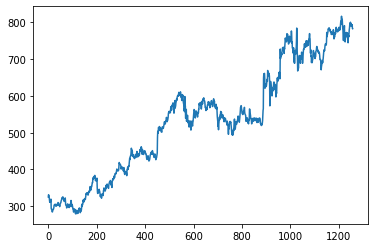

In [5]:
plt.plot(training_set)

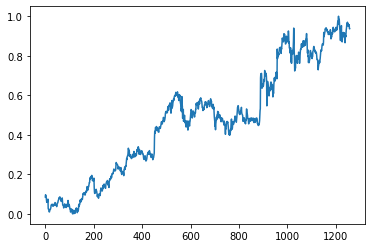

In [6]:
plt.plot(training_set_scaled)

In [7]:
INPUT_SIZE = 60
HIDDEN_SIZE = 64
NUM_LAYERS = 2
OUTPUT_SIZE = 1

In [8]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(INPUT_SIZE, 1258):
    X_train.append(training_set_scaled[i-INPUT_SIZE:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [9]:
training_set_scaled[62-60:62,0].shape

(60,)

In [10]:
training_set_scaled[61,0]

0.08471612471166012

In [11]:
X_train.shape

(1198, 1, 60)

In [12]:
X_train[0]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]])

In [13]:
X_train[1]

array([[0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
        0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
        0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
        0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875,
        0.03936305, 0.04137213, 0.04034898, 0.04784582, 0.04325099,
        0.04356723, 0.04286033, 0.04602277, 0.05398467, 0.05738894,
        0.05714711, 0.05569611, 0.04421832, 0.04514845, 0.04605997,
        0.04412531, 0.03675869, 0.04486941, 0.05065481, 0.05214302,
        0.05612397, 0.05818885, 0.06540665, 0.06882953, 0.07243843,
        0.07993526, 0.07846566, 0.08034452, 0.08497656, 0.08627874]])

In [14]:
X_train.shape

(1198, 1, 60)

### 2. Implement the model

In [15]:
class RNN(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size):
        super(RNN, self).__init__()
        
        self.rnn = torch.nn.RNN(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers
        )
        
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x):
        
        r_out, hidden_state = self.rnn(x)
        
        hidden_size = hidden_state[-1].size(-1)
        r_out = r_out.view(-1, hidden_size)
        
        outs = self.out(r_out)
        
        return outs, hidden_state

In [16]:
rnn = RNN(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE)

### 3. Train the model

In [17]:
learning_rate = 0.01
num_epochs = 50

In [18]:
optimiser = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [ ]:
import sys

In [19]:
hidden_state = None

for epoch in range(num_epochs):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimiser.zero_grad()
    
    output, hidden_state = rnn(inputs) 
    
    loss = criterion(output.view(-1), labels)
    
    loss.backward(retain_graph=True)                     
    optimiser.step()                                     
    
    print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 0, loss 0.32804399728775024
epoch 1, loss 0.21223272383213043
epoch 2, loss 0.13848578929901123
epoch 3, loss 0.09111297875642776
epoch 4, loss 0.06088285520672798
epoch 5, loss 0.04183366522192955
epoch 6, loss 0.029988029971718788
epoch 7, loss 0.022699294611811638
epoch 8, loss 0.01823863387107849
epoch 9, loss 0.01550280675292015
epoch 10, loss 0.013803768903017044
epoch 11, loss 0.012721020728349686
epoch 12, loss 0.012001869268715382
epoch 13, loss 0.011496556922793388
epoch 14, loss 0.011117263697087765
epoch 15, loss 0.010812930762767792
epoch 16, loss 0.010554025880992413
epoch 17, loss 0.010323559865355492
epoch 18, loss 0.010111755691468716
epoch 19, loss 0.009912987239658833
epoch 20, loss 0.00972398929297924
epoch 21, loss 0.009542860090732574
epoch 22, loss 0.009368455037474632
epoch 23, loss 0.009200068190693855
epoch 24, loss 0.009037237614393234
epoch 25, loss 0.008879645727574825
epoch 26, loss 0.008727062493562698
epoch 27, loss 0.008579284884035587
epoch 28, l

### 4. Evaluate the model

In [20]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_test.shape

(20, 6)

In [22]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [24]:
dataset_total.shape

(1278,)

In [25]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - INPUT_SIZE:].values

In [26]:
dataset_total[len(dataset_total) - len(dataset_test) - INPUT_SIZE:].values.shape

(80,)

In [27]:
inputs.shape

(80,)

In [28]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [29]:
inputs.shape

(80, 1)

In [30]:
X_test = []
for i in range(INPUT_SIZE, 80):
    
    X_test.append(inputs[i-INPUT_SIZE:i, 0])
    
X_test = np.array(X_test)

In [31]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_test.shape

In [32]:
X_train_X_test = np.concatenate((X_train, X_test),axis=0)

In [33]:
X_train_X_test.shape

(1218, 1, 60)

In [34]:
test_inputs = torch.from_numpy(X_train_X_test).float()
predicted_stock_price, b = rnn(test_inputs)

In [35]:
test_inputs.shape

torch.Size([1218, 1, 60])

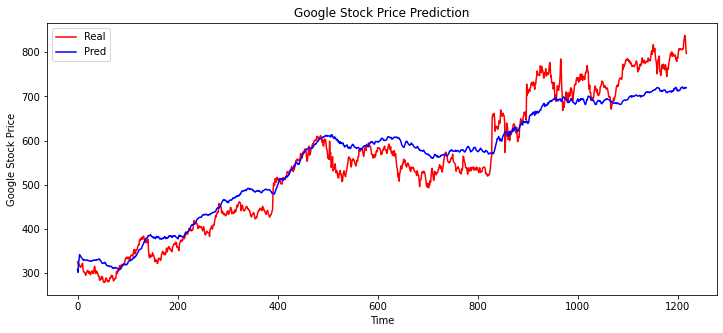

In [36]:
predicted_stock_price = np.reshape(predicted_stock_price.detach().numpy(), (test_inputs.shape[0], 1))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price_all = np.concatenate((training_set[INPUT_SIZE:], real_stock_price))

# Visualising the results
plt.figure(1, figsize=(12, 5))
plt.plot(real_stock_price_all, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Pred')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()